In [8]:
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

from sklearn.svm import SVC
from EML_plot import plot_svc, ilustrasi_RBF
from ipywidgets import interact, fixed

df = read_csv("./data4.csv")
df.tail(15).T

,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210
x_1,-0.10830,-0.50461,-0.41705,-0.440090,-0.241940,-0.20968,-0.28376,-0.37500,-0.12408,-0.39574,-0.21532,0.17281,0.06682,0.29263,-0.061866
x_2,-0.30117,-0.12573,-0.16082,0.008772,0.061403,-0.58187,-0.38450,-0.43772,-0.12661,-0.35175,0.29503,-0.27193,-0.51754,-0.30117,-0.016082
Label,0.00000,1.00000,0.00000,1.000000,1.000000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.000000


In [9]:
X = df.drop("Label",axis=1)
y = df.Label

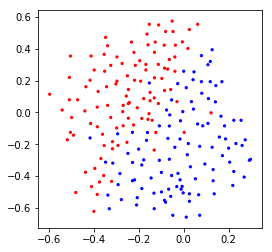

In [10]:
plt.figure(figsize=(4,4))
plt.scatter(X.x_1, X.x_2, c=y, cmap="bwr", s=5)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((168, 2), (43, 2), (168,), (43,))

In [12]:
pipeline = Pipeline([
    ("ss", StandardScaler()),
    ("svm", SVC(kernel="rbf"))])

params = {
    "svm__C" : np.logspace(3,12,4),
    "svm__gamma" : np.logspace(-3,3,7),
}

model = GridSearchCV(pipeline,param_grid=params,n_jobs=-1,cv=3)
model.fit(X_train,y_train)
model.best_params_

{'svm__C': 1000000.0, 'svm__gamma': 0.001}

In [13]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9226190476190477, 0.9767441860465116)

In [14]:
print(accuracy_score(y_train,model.predict(X_train)))
print(accuracy_score(y_test,model.predict(X_test)))

0.9226190476190477
0.9767441860465116


Plot Generated SVM Model in the real data

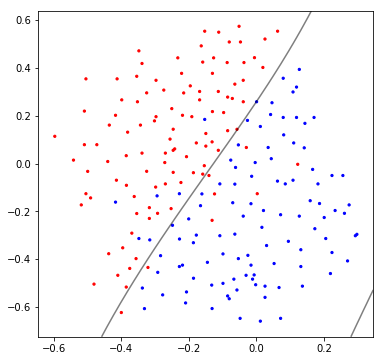

In [15]:
plot_svc(X, y, model, support=False)

In [16]:
f1_score(y_train, model.predict(X_train), average=None)

array([0.92655367, 0.91823899])

In [18]:
f1_score(y_test, model.predict(X_test), average=None)

array([0.97142857, 0.98039216])

# How to Persist Model

In [21]:
import pickle

In [23]:
pickle.dump(model, open("our_model.pkl", "wb"))

In [26]:
save_all = {
    "model" : model,
    "X_train" : X_train,
    "X_test" : X_test,
    "y_train" : y_train,
    "y_test" : y_test,
}

pickle.dump(save_all, open("our_model_save_all.pkl", "wb"))

# How To Load Model

In [27]:
pickle.load(open("our_model.pkl", "rb"))

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'svm__C': array([1.e+03, 1.e+06, 1.e+09, 1.e+12]), 'svm__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
load = pickle.load(open("our_model_save_all.pkl", "rb"))
#the model will be loaded into dictionary
load

{'model': GridSearchCV(cv=3, error_score='raise',
        estimator=Pipeline(memory=None,
      steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False))]),
        fit_params=None, iid=True, n_jobs=-1,
        param_grid={'svm__C': array([1.e+03, 1.e+06, 1.e+09, 1.e+12]), 'svm__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring=None, verbose=0), 'X_train':           x_1       x_2
 127  0.011521 -0.657900
 108 -0.509220  0.078947
 69  -0.347930 -0.312870
 84  -0.274190  0.307020
 97  -0.410250 -0.466370
 101 -0.331450 -0.605560
 38  -0.153110  0.552920
 24  -0.316940 -0.228950
 184 -0.168200  0.266080
 118  0.131340 -0.359650
 29